<br>
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQF7Yd-M972PyWRkYxiXb09-iUccRgCqyxcJB8dau4Df0XS3bGDdbP0RtjuAbzX7vgeYyY&usqp=CAU"></center>
<br>

# <center> PROYECTO FINAL </center>

## <center> ANÁLISIS LIGA ESPAÑOLA / TOP 5 LIGAS EUROPEAS </center>



Temática del proyecto final:
Trabajo como analista de datos en La Liga y me han pedido hacer un análisis de La Liga y compararla con las otras 4 ligas más importantes. Estas ligas son la inglesa (Premier League), la italiana (Serie A), la alemana (Bundesliga) y la francesa (Ligue 1).
El análisis será de las temporadas 17/18, 18/19 y 19/20. Se han elegido estos años porque son los últimos previos a la pandemia, es decir, en los que hay una normalidad en los datos.

## <center> PREPROCESAMIENTO </center>

Importo todas las librerías necesarias. Al ser un trabajo en el que voy a intentar aplicar un poco de todo
lo visto en el bootcamp, voy a tener que importar muchas librerías.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

from wordcloud import WordCloud

from IPython.display import Image
import matplotlib.image as mpimg
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from datetime import datetime



Ya tengo seleccionado y guardado el csv con el que voy a trabajar, por lo que ya puedo cargarlo.

In [3]:
df=pd.read_csv(r"C:\Users\Usuario\Desktop\samplerepo\LIGAS\Output.csv")
df

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,CL,WinCL
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,No,No
1,Zlatan Ibrahimović,37,195.0,Sweden,Forward,3500000,18,1362,10,5,...,6,38,19,9,10,63,46,66,No,No
2,Zinedine Ferhat,26,180.0,Algeria,Forward,2000000,26,2246,3,4,...,18,28,7,6,15,29,44,27,No,No
3,Zinédine Ould Khaled,19,195.0,France,Midfield,15000,1,59,0,0,...,11,28,11,6,11,28,33,39,No,No
4,Zeki Celik,22,180.0,Turkey,Defender,20000000,23,2070,0,2,...,4,28,15,4,9,35,27,49,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6819,Victor Osimhen,18,186.0,Niger,Forward,1000000,12,287,0,0,...,16,34,6,15,13,36,48,33,No,No
6820,Renato Steffen,25,170.0,Switzerland,Forward,3500000,16,659,0,0,...,16,34,6,15,13,36,48,33,No,No
6821,Paul Jaeckel,19,189.0,Germany,Defender,5000,3,270,0,0,...,16,34,6,15,13,36,48,33,No,No
6822,Paul Verhaegh,33,178.0,Netherlands,Defender,1000000,31,2614,2,2,...,16,34,6,15,13,36,48,33,No,No


Miro la forma que tienen mis datos

In [4]:
df.shape

(6824, 46)

Veo el tipo de dato de cada columna con la que voy a trabajar.

In [5]:
df.dtypes

player                      object
age                          int64
height                     float64
nationality                 object
position                    object
value                        int64
games                        int64
minutes                      int64
goals                        int64
assists                      int64
crosses                      int64
tackles                      int64
pressures                    int64
blocks                       int64
touches                      int64
fouls                        int64
fouled                       int64
offsides                     int64
own goals                    int64
ball recoveries              int64
saves                        int64
squad                       object
Season                      object
league                      object
Attendance                   int64
games starts                 int64
passes completed             int64
sca                          int64
gca                 

Echo un vistazo general a diferentes datos que me aporta el .info.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6824 entries, 0 to 6823
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   player                   6824 non-null   object 
 1   age                      6824 non-null   int64  
 2   height                   6823 non-null   float64
 3   nationality              6824 non-null   object 
 4   position                 6824 non-null   object 
 5   value                    6824 non-null   int64  
 6   games                    6824 non-null   int64  
 7   minutes                  6824 non-null   int64  
 8   goals                    6824 non-null   int64  
 9   assists                  6824 non-null   int64  
 10  crosses                  6824 non-null   int64  
 11  tackles                  6824 non-null   int64  
 12  pressures                6824 non-null   int64  
 13  blocks                   6824 non-null   int64  
 14  touches                 

Con describe veo información de las columnas con datos numéricos.

In [7]:
df.describe()

,age,height,value,games,minutes,goals,assists,crosses,tackles,pressures,...,cards yellow,shots total,LgRk,MP,W,D,L,GF,GA,Pts
count,6824.000000,6823.000000,6.824000e+03,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,...,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,25.429513,181.963506,1.023350e+07,19.031653,1342.866208,1.828693,1.261284,16.994285,22.942556,213.284437,...,2.787222,17.054367,10.337046,36.583529,13.725381,9.071073,13.787075,50.425557,50.479045,50.236665
std,4.444391,9.529490,1.660910e+07,11.175267,972.311088,3.458147,2.021036,24.585900,22.318046,189.785532,...,2.820151,21.584069,5.721757,2.868877,6.015922,3.091087,5.721998,17.686226,13.249049,17.365470
min,0.000000,0.000000,5.000000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,27.000000,2.000000,2.000000,1.000000,22.000000,21.000000,13.000000
25%,22.000000,178.000000,1.500000e+06,9.000000,455.000000,0.000000,0.000000,1.000000,4.000000,49.000000,...,0.000000,2.000000,5.000000,38.000000,9.000000,7.000000,10.000000,37.000000,42.000000,39.000000
50%,25.000000,183.000000,4.000000e+06,20.000000,1236.000000,0.000000,0.000000,6.000000,17.000000,175.000000,...,2.000000,10.000000,10.000000,38.000000,13.000000,9.000000,14.000000,47.000000,50.000000,48.000000
75%,28.000000,187.000000,1.200000e+07,29.000000,2121.000000,2.000000,2.000000,23.000000,36.000000,326.000000,...,4.000000,23.000000,15.000000,38.000000,17.000000,11.000000,17.000000,59.000000,59.000000,60.000000
max,41.000000,203.000000,2.000000e+08,38.000000,3420.000000,36.000000,21.000000,223.000000,160.000000,1056.000000,...,17.000000,196.000000,20.000000,38.000000,32.000000,18.000000,29.000000,108.000000,85.000000,100.000000


Es muy necesario ver todas las columnas que forman el dataset para empezar a pensar qué tipo de análisis
puedo hacer en base a ellas.

In [8]:
df.columns

Index(['player', 'age', 'height', 'nationality', 'position', 'value', 'games',
       'minutes', 'goals', 'assists', 'crosses', 'tackles', 'pressures',
       'blocks', 'touches', 'fouls', 'fouled', 'offsides', 'own goals',
       'ball recoveries', 'saves', 'squad', 'Season', 'league', 'Attendance',
       'games starts', 'passes completed', 'sca', 'gca', 'dribbles completed',
       'pens won', 'goals against gk', 'shots on target against',
       'CLBestScorer', 'cards yellow', 'shots total', 'LgRk', 'MP', 'W', 'D',
       'L', 'GF', 'GA', 'Pts', 'CL', 'WinCL'],
      dtype='object')

Veo que no hay valores duplicados

In [9]:
df.duplicated().sum()

0

En cuanto a los valores nulos, sólo hay uno en la columna de altura y 400 en otra columna que te dice si 
ese jugador ha sido máximo goleador de la Champions League algún año.

In [10]:
df.isnull().sum()

player                       0
age                          0
height                       1
nationality                  0
position                     0
value                        0
games                        0
minutes                      0
goals                        0
assists                      0
crosses                      0
tackles                      0
pressures                    0
blocks                       0
touches                      0
fouls                        0
fouled                       0
offsides                     0
own goals                    0
ball recoveries              0
saves                        0
squad                        0
Season                       0
league                       0
Attendance                   0
games starts                 0
passes completed             0
sca                          0
gca                          0
dribbles completed           0
pens won                     0
goals against gk             0
shots on

Creo una nueva columna con los goles generados, es decir, la suma de la columna de los goles y de la columna de las asistencias que da cada jugador.

In [11]:
df["G+A"]=df["goals"]+df["assists"]

Creo otra columna. Está será el porcentaje de tiros que ha parado cada portero. Para calcularla tengo que 
restar los goles que han encajado a los tiros que han ido a porteria, y tendría el número de tiros que han
parado. Después lo multiplico por 100 y lo divido entre el número de tiros toales, y me da el porcentaje 
de tiros parados.

In [12]:
df["saves %"]=(df["shots on target against"]-df["GA"])*100/df["shots on target against"]

Elimino algunas columnas que no voy a utilizar.

In [13]:
df.drop(["CL","WinCL","CLBestScorer","sca","gca","offsides", "own goals",
       "ball recoveries"], axis=1, inplace=True)

In [14]:
df.columns

Index(['player', 'age', 'height', 'nationality', 'position', 'value', 'games',
       'minutes', 'goals', 'assists', 'crosses', 'tackles', 'pressures',
       'blocks', 'touches', 'fouls', 'fouled', 'saves', 'squad', 'Season',
       'league', 'Attendance', 'games starts', 'passes completed',
       'dribbles completed', 'pens won', 'goals against gk',
       'shots on target against', 'cards yellow', 'shots total', 'LgRk', 'MP',
       'W', 'D', 'L', 'GF', 'GA', 'Pts', 'G+A', 'saves %'],
      dtype='object')

<br>
<center><img src="https://phantom-marca.unidadeditorial.es/1f551d68c4707c3d0755f3c03727a957/resize/1320/f/jpg/assets/multimedia/imagenes/2020/09/08/15995796510240.jpg"></center>
<br>
Imagen obtenida de Marca.com

## <center> ANÁLISIS LIGA ESPAÑOLA </center>

Voy a comenzar a analizar a los jugadores destacados y diferentes aspectos del juego de la liga española
en los 3 años que incluye el dataset.
Lo primero que voy a hacer es crear otro dataset para quedarme sólo con los jugadores de la liga española,
que son los que me interesan ahora.

In [15]:
la_liga=df[df["league"] == "La Liga"]
la_liga

,player,age,height,nationality,position,value,games,minutes,goals,assists,...,LgRk,MP,W,D,L,GF,GA,Pts,G+A,saves %
0,Zouhair Feddal,30,192.0,Morocco,Defender,4000000,17,1431,1,2,...,15,38,10,11,17,48,60,41,3,-inf
12,Yuri Berchiche,29,181.0,Spain,Defender,16000000,33,2850,2,1,...,11,38,13,12,13,41,38,51,3,-inf
19,Youssef En-Nesyri,22,189.0,Morocco,Forward,12000000,18,1385,4,2,...,18,38,8,12,18,30,51,36,6,-inf
20,Youssef En-Nesyri,22,189.0,Morocco,Forward,12000000,18,796,4,0,...,4,38,19,13,6,54,34,70,4,-inf
30,Yeray Álvarez,24,182.0,Spain,Defender,24000000,32,2810,0,0,...,11,38,13,12,13,41,38,51,0,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,Ramiro Guerra,20,183.0,Uruguay,Midfield,30000,4,74,0,0,...,5,38,18,7,13,57,50,61,0,-inf
6782,Daniele Bonera,36,183.0,Italy,Defender,20000,15,1192,0,1,...,5,38,18,7,13,57,50,61,1,-inf
6792,Fabio González,20,176.0,Spain,Midfield,15000,1,63,0,0,...,19,38,5,7,26,24,74,22,0,-inf
6795,Sergio Mora,37,182.0,Spain,Midfield,10000,26,826,0,0,...,8,38,15,10,13,42,33,55,0,-inf


Ahora lo filtro por años, para así poder ver cómo han variado los datos en estos 3 años, pudiendo analizar
tendencias para ver si va teniendo una evolución positiva o negativa.

In [16]:
la_liga_2017 = la_liga[la_liga["Season"]=="01/01/2017"]
la_liga_2018 = la_liga[la_liga["Season"]=="01/01/2018"]
la_liga_2019 = la_liga[la_liga["Season"]=="01/01/2019"]

### <center> JUGADORES </center>
Primero me voy a centrar en ver qué jugadores han sido los más destacados, ya que es importante para 
La Liga saber quiénes han sido las estrellas en este tiempo.

Precio jugadores

Análisis de los jugadores más caros según su valor de mercado en cada uno de los 3 años.

#### 2017

In [17]:
mejores_jugadores_2017 = (la_liga_2017.groupby("player")["value"].sum().sort_values(ascending=False))
mejores_jugadores_2017.head(10)

player
Lionel Messi         180000000
Antoine Griezmann    100000000
Philippe Coutinho    100000000
Cristiano Ronaldo    100000000
Gareth Bale           90000000
Sergio Busquets       80000000
Toni Kroos            80000000
Ousmane Dembélé       80000000
Marco Asensio         75000000
Isco                  75000000
Name: value, dtype: int64

In [18]:
gráfica_mej_jug_2017 = la_liga_2017.sort_values(by="value", ascending=False)
gráfica_mej_jug_2017 = gráfica_mej_jug_2017.head(3)

fig = px.bar(gráfica_mej_jug_2017, x="player", y="value", color="value")
fig.update_layout(title=dict(text="Jugadores más caros en 2017", x=0.5, xanchor="center"))

fig.show()

#### 2018

In [19]:
mejores_jugadores_2018 = (la_liga_2018.groupby("player")["value"].sum().sort_values(ascending=False))
mejores_jugadores_2018.head(10)

player
Lionel Messi             150000000
Antoine Griezmann        130000000
Jan Oblak                100000000
Ousmane Dembélé          100000000
Saúl Ñíguez               90000000
Philippe Coutinho         90000000
Marc-André ter Stegen     90000000
Rodri                     80000000
Lucas Hernández           70000000
Koke                      70000000
Name: value, dtype: int64

In [20]:
gráfica_mej_jug_2018 = la_liga_2018.sort_values(by="value", ascending=False)
gráfica_mej_jug_2018 = gráfica_mej_jug_2018.head(3)

fig = px.bar(gráfica_mej_jug_2018, x="player", y="value", color="value")
fig.update_layout(title=dict(text="Jugadores más caros en 2018", x=0.5, xanchor="center"))

fig.show()

#### 2019

In [21]:
mejores_jugadores_2019 = (la_liga_2019.groupby("player")["value"].sum().sort_values(ascending=False))
mejores_jugadores_2019.head(10)

player
Lionel Messi             112000000
Antoine Griezmann         96000000
Jan Oblak                 90000000
Joao Felix                81000000
Ansu Fati                 80000000
Eden Hazard               80000000
Marc-André ter Stegen     72000000
Frenkie de Jong           72000000
Saúl Ñíguez               72000000
Jose María Gimenez        70000000
Name: value, dtype: int64

In [22]:
gráfica_mej_jug_2019 = la_liga_2019.sort_values(by="value", ascending=False)
gráfica_mej_jug_2019 = gráfica_mej_jug_2019.head(3)

fig = px.bar(gráfica_mej_jug_2019, x="player", y="value", color="value")
fig.update_layout(title=dict(text="Jugadores más caros en 2019", x=0.5, xanchor="center"))

fig.show()

El jugador con más valor de mercado en cada uno de los 3 años ha sido Messi. También destacar a Griezzmann que es segundo también durante los 3 años.

Goleadores

Ahora voy a ver quiénes han sido los jugadores que más goles han marcado en cada uno de los 3 años y en el global.

### 2017

In [23]:
goleadores_2017 = (la_liga_2017.groupby("player")["goals"].sum().sort_values(ascending=False))
goleadores_2017.head(10)

player
Lionel Messi         34
Cristiano Ronaldo    26
Luis Suárez          25
Iago Aspas           22
Cristhian Stuani     21
Antoine Griezmann    19
Maxi Gómez           17
Gerard Moreno        16
Gareth Bale          16
Rodrigo              16
Name: goals, dtype: int64

In [24]:
gráfica_gol_2017 = la_liga_2017.sort_values(by="goals", ascending=False)
gráfica_gol_2017 = gráfica_gol_2017.head(5)

fig = px.bar(gráfica_gol_2017, x="player", y="goals", color="goals")
fig.update_layout(title=dict(text="Máximos goleadores 2017", x=0.5, xanchor="center"))

fig.show()

### 2018

In [25]:
goleadores_2018 = (la_liga_2018.groupby("player")["goals"].sum().sort_values(ascending=False))
goleadores_2018.head(10)

player
Lionel Messi         36
Luis Suárez          21
Karim Benzema        21
Iago Aspas           20
Cristhian Stuani     19
Wissam Ben Yedder    18
Borja Iglesias       17
Antoine Griezmann    15
Raúl de Tomás        14
Jaime Mata           14
Name: goals, dtype: int64

In [26]:
gráfica_gol_2018 = la_liga_2018.sort_values(by="goals", ascending=False)
gráfica_gol_2018 = gráfica_gol_2018.head(5)

fig = px.bar(gráfica_gol_2018, x="player", y="goals", color="goals")
fig.update_layout(title=dict(text="Máximos goleadores 2018", x=0.5, xanchor="center"))

fig.show()

### 2019

In [27]:
goleadores_2019 = (la_liga_2019.groupby("player")["goals"].sum().sort_values(ascending=False))
goleadores_2019.head(10)

player
Lionel Messi     25
Karim Benzema    21
Gerard Moreno    18
Luis Suárez      16
Raúl García      15
Lucas Ocampos    14
Iago Aspas       14
Ante Budimir     13
Álvaro Morata    12
Lucas PĂ©rez     11
Name: goals, dtype: int64

In [28]:
gráfica_gol_2019 = la_liga_2019.sort_values(by="goals", ascending=False)
gráfica_gol_2019 = gráfica_gol_2019.head(5)

fig = px.bar(gráfica_gol_2019, x="player", y="goals", color="goals")
fig.update_layout(title=dict(text="Máximos goleadores 2019", x=0.5, xanchor="center"))

fig.show()

### TOTAL

In [29]:
gol = la_liga.groupby("player").sum()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\1139857724.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [30]:
goleadores = (la_liga.groupby("player")["goals"].sum().sort_values(ascending=False))
goleadores.head(10)

player
Lionel Messi         95
Luis Suárez          62
Iago Aspas           56
Karim Benzema        47
Antoine Griezmann    43
Gerard Moreno        42
Cristhian Stuani     40
Maxi Gómez           39
Willian José         37
Mikel Oyarzabal      35
Name: goals, dtype: int64

In [31]:
total = la_liga.groupby("player").sum().reset_index()
gráfica_gol = total.sort_values(by="goals", ascending=False)
gráfica_gol = gráfica_gol.head(5)

fig = px.bar(gráfica_gol, x="player", y="goals", color="goals")
fig.update_layout(title=dict(text="Máximos goleadores", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\96558279.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Al igual que en el valor de mercado, Messi vuelve a ser el gran dominador en cuanto a goles, siendo el mejor durante los 3 años.

Asistentes

### 2017

In [32]:
asistentes_2017 = (la_liga_2017.groupby("player")["assists"].sum().sort_values(ascending=False))
asistentes_2017.head(10)

player
Lionel Messi         12
Antoine Griezmann     9
Karim Benzema         9
Pablo Fornals         9
José Luis Morales     8
Andrés Guardado       8
Daniel Wass           8
Antonio Barragán      7
Sergi Roberto         7
Lucas Vázquez         7
Name: assists, dtype: int64

In [33]:
gráfica_asist_2017 = la_liga_2017.sort_values(by="assists", ascending=False)
gráfica_asist_2017 = gráfica_asist_2017.head(5)

fig = px.bar(gráfica_asist_2017, x="player", y="assists", color="assists")
fig.update_layout(title=dict(text="Máximos asistentes 2017", x=0.5, xanchor="center"))

fig.show()

### 2018

In [34]:
asistentes_2018 = (la_liga_2018.groupby("player")["assists"].sum().sort_values(ascending=False))
asistentes_2018.head(10)

player
Lionel Messi         13
Pablo Sarabia        13
Jony                 11
Santi Cazorla        10
Wissam Ben Yedder     9
José Campaña          9
Antoine Griezmann     8
Jordi Alba            8
Sergi Roberto         7
Brais Méndez          7
Name: assists, dtype: int64

In [35]:
gráfica_asist_2018 = la_liga_2018.sort_values(by="assists", ascending=False)
gráfica_asist_2018 = gráfica_asist_2018.head(5)

fig = px.bar(gráfica_asist_2018, x="player", y="assists", color="assists")
fig.update_layout(title=dict(text="Máximos asistentes 2018", x=0.5, xanchor="center"))

fig.show()

### 2019

In [36]:
asistentes_2019 = (la_liga_2019.groupby("player")["assists"].sum().sort_values(ascending=False))
asistentes_2019.head(10)

player
Lionel Messi       21
Mikel Oyarzabal    11
Santi Cazorla       9
Roberto Torres      8
Luis Suárez         8
Karim Benzema       8
Luka Modric         7
JosĂ© CampaĂ±a      7
Portu               7
Ever Banega         7
Name: assists, dtype: int64

In [37]:
gráfica_asist_2019 = la_liga_2019.sort_values(by="assists", ascending=False)
gráfica_asist_2019 = gráfica_asist_2019.head(5)

fig = px.bar(gráfica_asist_2019, x="player", y="assists", color="assists")
fig.update_layout(title=dict(text="Máximos asistentes 2019", x=0.5, xanchor="center"))

fig.show()

### TOTAL

In [38]:
asistencias = (la_liga.groupby("player")["assists"].sum().sort_values(ascending=False))
asistencias.head(10)

player
Lionel Messi         46
Karim Benzema        23
Luis Suárez          21
Antoine Griezmann    21
Santi Cazorla        19
Jordi Alba           19
Pablo Sarabia        18
Mikel Oyarzabal      18
Daniel Wass          17
Rodrigo              17
Name: assists, dtype: int64

In [39]:
gráfica_asistencias = total.sort_values(by="assists", ascending=False)
gráfica_asistencias = gráfica_asistencias.head(5)

fig = px.bar(gráfica_asistencias, x="player", y="assists", color="assists")
fig.update_layout(title=dict(text="Máximos asistentes", x=0.5, xanchor="center"))

fig.show()

De nuevo, Messi vuelve a dominar sobre los demás jugadores y es el que más asistencias da.

Goles generados

### 2017

In [40]:
goles_gen_2017 = (la_liga_2017.groupby("player")["G+A"].sum().sort_values(ascending=False))
goles_gen_2017.head(10)

player
Lionel Messi         46
Luis Suárez          32
Cristiano Ronaldo    31
Antoine Griezmann    28
Iago Aspas           27
Cristhian Stuani     21
Maxi Gómez           21
Carlos Bacca         20
Gareth Bale          20
Rodrigo              20
Name: G+A, dtype: int64

In [41]:
gráfica_gg_2017 = la_liga_2017.sort_values(by="G+A", ascending=False)
gráfica_gg_2017 = gráfica_gg_2017.head(5)

fig = px.bar(gráfica_gg_2017, x="player", y="G+A", color="G+A")
fig.update_layout(title=dict(text="Goles generados 2017", x=0.5, xanchor="center"))

fig.show()

### 2018

In [42]:
goles_gen_2018 = (la_liga_2018.groupby("player")["G+A"].sum().sort_values(ascending=False))
goles_gen_2018.head(10)

player
Lionel Messi         49
Karim Benzema        27
Wissam Ben Yedder    27
Luis Suárez          27
Pablo Sarabia        26
Iago Aspas           26
Antoine Griezmann    23
Borja Iglesias       20
Jaime Mata           20
Cristhian Stuani     19
Name: G+A, dtype: int64

In [43]:
gráfica_gg_2018 = la_liga_2018.sort_values(by="G+A", ascending=False)
gráfica_gg_2018 = gráfica_gg_2018.head(5)

fig = px.bar(gráfica_gg_2018, x="player", y="G+A", color="G+A")
fig.update_layout(title=dict(text="Goles generados 2018", x=0.5, xanchor="center"))

fig.show()

### 2019

In [44]:
goles_gen_2019 = (la_liga_2019.groupby("player")["G+A"].sum().sort_values(ascending=False))
goles_gen_2019.head(10)

player
Lionel Messi       46
Karim Benzema      29
Luis Suárez        24
Gerard Moreno      23
Mikel Oyarzabal    21
Santi Cazorla      20
Iago Aspas         17
Raúl García        17
Lucas Ocampos      17
Lucas PĂ©rez       16
Name: G+A, dtype: int64

In [45]:
gráfica_gg_2019 = la_liga_2019.sort_values(by="G+A", ascending=False)
gráfica_gg_2019 = gráfica_gg_2019.head(5)

fig = px.bar(gráfica_gg_2019, x="player", y="G+A", color="G+A")
fig.update_layout(title=dict(text="Goles generados 2019", x=0.5, xanchor="center"))

fig.show()

### TOTAL
Analizo el total de goles generados en estos 3 años y vemos que Messi ha sido con mucha diferencia el jugador más decisivo de La Liga.
Como es habitual, los siguientes son jugadores del Madrid y del Bacelona y Griezmann del Atleti.
Por ello, quiero destacar a Iago Aspas, que consigue ser el cuartos jugador más decisivo en estos 3 años jugando en el Celta de Vigo, un equipo de menor nivel. Es un gran mérito que lo consiga y digno de elogiar.

In [46]:
gg = (la_liga.groupby("player")["G+A"].sum().sort_values(ascending=False))
gg.head(10)

player
Lionel Messi         141
Luis Suárez           83
Karim Benzema         70
Iago Aspas            70
Antoine Griezmann     64
Mikel Oyarzabal       53
Maxi Gómez            50
Gerard Moreno         49
Willian José          47
Rodrigo               45
Name: G+A, dtype: int64

In [47]:
gráfica_gg = total.sort_values(by="G+A", ascending=False)
gráfica_gg = gráfica_gg.head(5)

fig = px.bar(gráfica_gg, x="player", y="G+A", color="G+A")
fig.update_layout(title=dict(text="Goles generados", x=0.5, xanchor="center"))

fig.show()

In [48]:
Celta = la_liga[la_liga["squad"]=="Celta Vigo"]

Resto_jugadores = Celta[Celta["G+A"] < 16]["G+A"].sum()
Aspas = Celta[Celta["G+A"] > 16].append({"player": "Resto_jugadores", "G+A": Resto_jugadores}, ignore_index=True)

fig = px.pie(Aspas, values="G+A", names="player", title="Goles generados en el Celta", hole=0.5,)

fig.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\367332068.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Con esta distribución se ve que Aspas ha contribuido casi en uno de cada tres goles generados por el celta estos tres años. Es un dato que tiene mucho mérito y muestra la importancia que tiene para el equipo. Es similiar a la importancia de Messi en el Barsa, como se ve en el gráfico de abajo.

In [49]:
Barcelona = la_liga[la_liga["squad"]=="Barcelona"]

Resto_jugadores = Barcelona[Barcelona["G+A"] < 16]["G+A"].sum()
Messi = Barcelona[Barcelona["G+A"] > 16].append({"player": "Resto_jugadores", "G+A": Resto_jugadores}, ignore_index=True)

fig = px.pie(Messi, values="G+A", names="player", title="Goles generados en el Barsa", hole=0.5)

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\725063173.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Porteros

No hay que olvidarse de los porteros. Analizo cuáles han sido los porteros con mayor porcentaje de paradas con la nueva columna que cree al principio.

In [50]:
porteros_2017 = (la_liga_2017.groupby("player")["saves %"].sum().sort_values(ascending=False))
porteros_2017.head(10)

player
Jan Oblak                82.539683
Marc-André ter Stegen    77.519380
Neto                     74.666667
Fernando Pacheco         71.428571
Vicente Guaita           69.444444
Pau López                67.187500
Iván Cuéllar             64.335664
Keylor Navas             60.714286
Roberto                  57.638889
Antonio Adán             52.343750
Name: saves %, dtype: float64

In [51]:
gráfica_porteros_2017 = la_liga_2017.sort_values(by="saves %", ascending=False)
gráfica_porteros_2017 = gráfica_porteros_2017.head(5)

fig = px.bar(gráfica_porteros_2017, x="player", y="saves %", color="saves %")
fig.update_layout(title=dict(text="% paradas 2017", x=0.5, xanchor="center"))

fig.show()

In [52]:
porteros_2018 = (la_liga_2018.groupby("player")["saves %"].sum().sort_values(ascending=False))
porteros_2018.head(10)

player
Jan Oblak                76.422764
Neto                     73.880597
David Soria              72.440945
Marc-André ter Stegen    68.965517
Sergio Asenjo            68.292683
Diego López              67.948718
Fernando Pacheco         65.517241
Jordi Masip              63.571429
Pau López                61.481481
Iván Cuéllar             61.261261
Name: saves %, dtype: float64

In [53]:
gráfica_porteros_2018 = la_liga_2018.sort_values(by="saves %", ascending=False)
gráfica_porteros_2018 = gráfica_porteros_2018.head(5)

fig = px.bar(gráfica_porteros_2018, x="player", y="saves %", color="saves %")
fig.update_layout(title=dict(text="% paradas 2018", x=0.5, xanchor="center"))

fig.show()

In [54]:
porteros_2019 = (la_liga_2019.groupby("player")["saves %"].sum().sort_values(ascending=False))
porteros_2019.head(10)

player
Jan Oblak                74.285714
Thibaut Courtois         73.684211
Aitor Fernández          73.631841
Rui Silva                66.911765
Sergio Asenjo            65.492958
Marc-André ter Stegen    65.454545
Tomáš Vaclík             64.583333
Jordi Masip              64.462810
David Soria              63.725490
Unai Simón               63.106796
Name: saves %, dtype: float64

In [55]:
gráfica_porteros_2019 = la_liga_2019.sort_values(by="saves %", ascending=False)
gráfica_porteros_2019 = gráfica_porteros_2019.head(5)

fig = px.bar(gráfica_porteros_2019, x="player", y="saves %", color="saves %")
fig.update_layout(title=dict(text="% paradas 2019", x=0.5, xanchor="center"))

fig.show()

In [56]:
paradas = la_liga.groupby("player")["saves %"].mean().sort_values(ascending=False)
paradas

player
Jan Oblak                77.749387
Neto                     74.273632
Marc-André ter Stegen    70.646481
Vicente Guaita           69.444444
Rui Silva                66.911765
                           ...    
Álvaro Medrán                  NaN
Álvaro Morata                  NaN
Álvaro Odriozola               NaN
Ángel Correa                   NaN
Ángel Rodríguez                NaN
Name: saves %, Length: 883, dtype: float64

In [57]:
porteros=total
porteros["saves %"]=porteros["saves %"]/3

In [58]:
gráfica_paradas = porteros.sort_values(by="saves %", ascending=False)
gráfica_paradas = gráfica_paradas.head(5)

fig = px.bar(gráfica_paradas, x="player", y="saves %", color="saves %")
fig.update_layout(title=dict(text="% paradas", x=0.5, xanchor="center"))

fig.show()

El portero con mejor porcentaje de paradas en cada uno de los 3 años y, por lo tanto, también global, ha sido Oblak, del Atletico de Madrid.

### <center> EQUIPOS (VALOR, PUNTOS) </center>

In [59]:
club_valor = la_liga.groupby("squad")["value"].sum().sort_values(ascending=False)
club_valor

squad
Barcelona          2911000000
Real Madrid        2345530000
Atlético Madrid    2178770000
Valencia           1077900000
Real Sociedad       818615000
Sevilla             760710000
Athletic Club       650020800
Betis               617895000
Villarreal          600957500
Celta Vigo          517305000
Espanyol            366610700
Getafe              330425000
Alavés              243231600
Levante             223388300
Leganés             219330850
Eibar               159850200
Girona              159430000
Valladolid          131836700
Las Palmas           77665000
Rayo Vallecano       75700000
La Coruña            58210000
Granada              53687900
Mallorca             51478100
Málaga               44210000
Osasuna              43104700
Huesca               35200000
Name: value, dtype: int64

In [60]:
valor = la_liga.groupby("squad").sum().reset_index()
valor= valor.sort_values(by="value",ascending=False)

fig = px.bar(valor, x="squad", y="value", color="value")
fig.update_layout(title=dict(text="valor clubes", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3478357349.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [61]:
value_counts = la_liga_2019["value"]

fig = go.Figure(data=[go.Pie(labels=la_liga["squad"], values=value_counts,hovertext=value_counts.index)])
fig.update_layout(title_text= "Valor de las plantillas")

fig.show()


Aquí se puede ver del total del valor de los jugadores, qué porcentaje tiene cada equipo.
Los más destacados con diferencia son el Barcelona, Real Madrid y Atlético de Madrid. Esto es algo que todos sabemos, pero llama la atención que sólo entre esos 3 equipos ya sumen el 50%, quedando el otro 50% para los 17 equipos restantes.
Esto puede ser negativo, ya que afecta a la competición que haya mucha diferencia entre equipos, haciéndola menos competitiva y, por lo tanto, menos atractiva.

### <center> ESPECTÁCULO </center>

Quiero analizar algunos aspectos que influyen directamente en el espectáculo de cara al espectador, ya que lo que se espera desde La Liga es tener un producto atractivo que vaya aumentando su popularidad.

### FALTAS

In [62]:
club_faltas = la_liga.groupby("squad")["fouls"].sum()
club_faltas

squad
Alavés             1373
Athletic Club      1450
Atlético Madrid    1357
Barcelona          1078
Betis              1257
Celta Vigo         1225
Eibar              1347
Espanyol           1492
Getafe             1881
Girona              999
Granada             588
Huesca              440
La Coruña           399
Las Palmas          344
Leganés            1487
Levante            1227
Mallorca            468
Málaga              502
Osasuna             551
Rayo Vallecano      478
Real Madrid        1140
Real Sociedad      1366
Sevilla            1501
Valencia           1223
Valladolid          877
Villarreal         1566
Name: fouls, dtype: int64

In [63]:
faltas = la_liga.groupby("squad").sum().reset_index()
faltas= faltas.sort_values(by="fouls",ascending=False)

fig = px.bar(faltas, x="squad", y="fouls", color="fouls")
fig.update_layout(title=dict(text="faltas cometidas", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\1603034074.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Las faltas perjudican al espectáculo, ya que cada falta supone parar el juego, perder tiempo y cortar el ritmo del partido. El espectador se aburre si hay muchos parones, por lo que convendría tratar este tema para intentar que se mejore el producto de La Liga.
El equipo que más faltas ha hecho en este periodo de tiempo es el Getafe, equipo que ganó mucha notoriedad en esos años por su estilo de juego brusco, adquiriendo mala fama por muchos aficionados. Esto es negativo y no beneficia a La Liga.

### GOLES

In [64]:
goles = la_liga.groupby("squad")["goals"].sum().sort_values(ascending=False)
goles

squad
Barcelona          264
Real Madrid        209
Villarreal         161
Real Sociedad      160
Sevilla            157
Atlético Madrid    156
Valencia           145
Celta Vigo         139
Levante            138
Betis              134
Getafe             124
Eibar              113
Athletic Club      107
Alavés             103
Espanyol            87
Girona              82
Leganés             78
Valladolid          56
Granada             50
Osasuna             46
La Coruña           35
Mallorca            35
Rayo Vallecano      34
Málaga              23
Las Palmas          22
Huesca              21
Name: goals, dtype: int64

In [65]:
goles = la_liga.groupby("squad").sum().reset_index()
goles= goles.sort_values(by="goals",ascending=False)

fig = px.bar(goles, x="squad", y="goals", color="goals")
fig.update_layout(title=dict(text="goles por club", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3339205894.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



El factor más atractivo del fútbol son los goles, y es lo que la gente quiere ver.
El Barcelona y el Madrid son los equipos que más goles marcan con diferencia. Posteriormente lo compararé con las otras ligas para entender mejor y poner en contexto esta cantidad de goles.

<br>
<center><img src="https://miro.medium.com/max/785/1*g7Vjd3-fQRoB488P19jSGA.jpeg"></center>
<br>

## <center> VS RESTO DE LIGAS </center>

Ahora, voy a comparar a La Liga con las otras cuatro mejores ligas europeas.
El objetivo es ver cómo está La liga en comparación a su competencia y ver en qué aspectos puede mejorar para intentar ser la mejor liga, ya que no lo es.

In [66]:
df_2019 = df[df["Season"]=="01/01/2019"]

In [67]:
valor_2019= df_2019.groupby("league").sum().reset_index()
valor_2019= valor_2019.sort_values(by="value",ascending=False)

fig = px.bar(valor_2019, x="league", y="value", color="value")
fig.update_layout(title=dict(text="valor por club", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3281135555.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [68]:
valor_liga = df.groupby("league").sum().reset_index()
valor_liga= valor_liga.sort_values(by="value",ascending=False)

fig = px.bar(valor_liga, x="league", y="value", color="value")
fig.update_layout(title=dict(text="valor por club", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3723801629.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Si se suma el valor de todos los jugadores de cada liga durante los tres años, se aprecia que la liga que tiene mayor cantidad de buenos jugadores es la Premier League.
En segundo lugar está La Liga, aunque a mucha distancia de la Premier League. Hay más diferencia desde La Liga hasta la Ligue 1, que es la que menor valor tiene, que desde La Liga hasta la Premier League.
Es una brecha importante que habría que intentar reducir.

In [69]:
premier_2019=df_2019[df["league"] == "Premier League"]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3471443374.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [70]:
values = premier_2019["value"]

fig = go.Figure(data=[go.Pie(labels=premier_2019["squad"], values=values,hovertext=value_counts.index)])
fig.update_layout(title_text= "Valor de las plantillas")

fig.show()

In [71]:
value_counts = la_liga_2019["value"]

fig = go.Figure(data=[go.Pie(labels=la_liga["squad"], values=value_counts,hovertext=value_counts.index)])
fig.update_layout(title_text= "Valor de las plantillas")

fig.show()

He querido comparar el reparto de valor de las plantillas entre La Liga y la Premier League, ya que sabemos ahora que la Premier League tiene un mayor valor en sus jugadores.
Considero que la Premier League tiene un mejor reparto de su riqueza, lo que hace que algunos equipo sean más competitivos.
Que haya mucha desigualdad entre las plantillas perjudica a los clubes, ya que hace la cometición menos atractiva.

In [72]:
valor_ligas = df.groupby("squad").sum().reset_index()
valor_ligas= valor_ligas.sort_values(by="value",ascending=False)
valor_ligas=valor_ligas.head(10)

fig = px.bar(valor_ligas, x="squad", y="value", color="value")
fig.update_layout(title=dict(text="valor por club", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\2411040224.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Ahora quiero ver cuáles son los diez equipos con mayor valor en sus plantillas.
Se ve que hay cinco equipos de la Premier League, lo que demuestra una vez más su poderío económico.
En España, vemos que solo el Barcelona, el Madrid y el Atleti pueden acercarse al presupuesto de la Premier.
También está el PSG de la liga francesa y el Bayern de Munich de la liga alemana.

In [73]:
contenido_madrid = "Real Madrid y Atlético de Madrid"
popup_madrid = folium.Popup(html=contenido_madrid, max_width=500)
contenido_bayern = "Bayern de Munich"
popup_bayern = folium.Popup(html=contenido_bayern, max_width=500)
contenido_paris = "Paris Saint-Germain"
popup_paris = folium.Popup(html=contenido_paris, max_width=500)
contenido_londres = "Chelsea y Tottenham"
popup_londres = folium.Popup(html=contenido_londres, max_width=500)
contenido_bayern = "Bayern de Munich"
popup_bayern = folium.Popup(html=contenido_bayern, max_width=500)
contenido_manchester = "Manchester City y Manchester United"
popup_manchester = folium.Popup(html=contenido_manchester, max_width=500)

In [74]:
map = folium.Map(location=[40.4168, -3.7038], zoom_start=6)
folium.Marker(
    location=[40.4168, -3.7038],
    popup=popup_madrid,
    max_width=2000,
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[41.3851, 2.1734],
    popup="Barcelona",
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[48.8566,2.3522],
    popup=popup_paris,max_width=500,
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[48.1351,11.5820],
    popup=popup_bayern,
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[53.48095,-2.23743],
    popup=popup_manchester,
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[51.5074,0.1278],
    popup=popup_londres,
    tooltip="Haz clic para ver más"
).add_to(map)

# Agregar marcador en la segunda ubicación
folium.Marker(
    location=[53.41058,-2.97794],
    popup="Liverpool",
    tooltip="Haz clic para ver más"
).add_to(map)


map.save("esto.html")
map

En este mapa he ubicado estos diez equipos más potentes, para ver de forma clara cómo Inglaterra es la liga dominante, seguida por la española.

In [75]:
goles_ligas = df.groupby("league").sum().reset_index()
goles_ligas= goles_ligas.sort_values(by="goals",ascending=False)


fig = px.bar(goles_ligas, x="league", y="goals", color="goals")
fig.update_layout(title=dict(text="goles marcados", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\2356157611.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [76]:
faltas_ligas = df.groupby("league").sum().reset_index()
faltas_ligas= faltas_ligas.sort_values(by="fouls",ascending=False)


fig = px.bar(faltas_ligas, x="league", y="fouls", color="fouls")
fig.update_layout(title=dict(text="faltas cometidas", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\2851640283.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



En cuanto al número de faltas, La Liga aparece en primera posición. Como he comentado antes, esto es un aspecto negativo que perjudica al espectáculo.

In [77]:
tarjetas_ligas = df.groupby("cards yellow").sum().reset_index()
tarjetas_ligas= faltas_ligas.sort_values(by="cards yellow",ascending=False)


fig = px.bar(tarjetas_ligas, x="league", y="cards yellow", color="cards yellow")
fig.update_layout(title=dict(text="tarjetas amarillas", x=0.5, xanchor="center"))

fig.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\2389047815.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Respecto a las tarjetas amarillas, vemos que La Liga vuelve a estar en primera posición. Esto es lógico ya que tiene una relación directa con el número de faltas. Cuantas más faltas se hagan, más tarjetas se van a sacar.
La Premier League aparece en cuarta y tercera posición, respectivamente. Sumado a que tiene las mejores plantillas, deja claro qué espectáculo es mejor. El resto de ligas, pese a tener menor presupuesto para tener grandes jugadores, pueden tener un juego más fluido porque hay menos interrupciones debido a las faltas y tarjetas.

In [78]:
equipos2019=df_2019.groupby("squad").sum().reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_54248\3865478355.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [79]:
equipos = df.groupby("squad").sum().reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_54248\80871934.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [80]:
equipos["squad"].value_counts()

Alavés            1
Real Sociedad     1
Rayo Vallecano    1
RB Leipzig        1
Parma             1
                 ..
Fiorentina        1
Everton           1
Espanyol          1
Empoli            1
Wolves            1
Name: squad, Length: 122, dtype: int64

In [120]:
x1 = equipos["fouls"]
y1 = equipos["Pts"]
coefficients1 = np.polyfit(x1, y1, 1)
line_x1 = np.array([x1.min(), x1.max()])
line_y1 = coefficients1[0] * line_x1 + coefficients1[1]

In [121]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x1, y=line_y1, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["fouls"], y=equipos["Pts"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Faltas|Puntos",
                  xaxis_title="Faltas",
                  yaxis_title="Puntos",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

In [122]:
x2 = equipos["cards yellow"]
y2 = equipos["Pts"]
coefficients2 = np.polyfit(x2, y2, 1)
line_x2 = np.array([x2.min(), x2.max()])
line_y2 = coefficients2[0] * line_x2 + coefficients2[1]

In [123]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x2, y=line_y2, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["cards yellow"], y=equipos["Pts"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Tarjetas amarillas|Puntos",
                  xaxis_title="Tarjetas amarillas",
                  yaxis_title="Puntos",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

In [124]:
x3 = equipos["passes completed"]
y3 = equipos["Pts"]
coefficients3 = np.polyfit(x3, y3, 1)
line_x3 = np.array([x3.min(), x3.max()])
line_y3 = coefficients3[0] * line_x3 + coefficients3[1]

In [125]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x3, y=line_y3, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["passes completed"], y=equipos["Pts"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Pases Completados|Puntos",
                  xaxis_title="Pases completados",
                  yaxis_title="Puntos",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

In [126]:
x4 = equipos["pressures"]
y4 = equipos["Pts"]
coefficients4 = np.polyfit(x4, y4, 1)
line_x4 = np.array([x4.min(), x4.max()])
line_y4 = coefficients4[0] * line_x4 + coefficients4[1]

In [127]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x4, y=line_y4, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["pressures"], y=equipos["Pts"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Presiones|Puntos",
                  xaxis_title="Presiones",
                  yaxis_title="Puntos",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

In [128]:
x5 = equipos["value"]
y5 = equipos["Pts"]
coefficients5 = np.polyfit(x5, y5, 1)
line_x5 = np.array([x5.min(), x5.max()])
line_y5 = coefficients5[0] * line_x5 + coefficients5[1]

In [129]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x5, y=line_y5, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["value"], y=equipos["Pts"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Valor de la plantilla|Puntos",
                  xaxis_title="Valor",
                  yaxis_title="Puntos",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

In [130]:
x6 = equipos["value"]
y6 = equipos["passes completed"]
coefficients6 = np.polyfit(x6, y6, 1)
line_x6 = np.array([x6.min(), x6.max()])
line_y6 = coefficients6[0] * line_x6 + coefficients6[1]

In [131]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=line_x6, y=line_y6, mode="lines", name= "Regresión lineal"))
fig.add_trace(go.Scatter(x=equipos["value"], y=equipos["passes completed"], mode="markers",text=equipos["squad"]))
fig.update_layout(title="Valor de la plantilla|Pases completados",
                  xaxis_title="Valor",
                  yaxis_title="Pases completados",
                  xaxis=dict(showticklabels=False),
                  yaxis=dict(showticklabels=False))
fig.show()

Con todas estas gráficas de dispersión he querido comprobar la relación que tienen algunas de las variables con los puntos que se consiguen, para ver de forma más clara cómo afectan estos factores y poder identificar a los equipos.

## <center> CORRELACIÓN </center>

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24308\3472979223.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



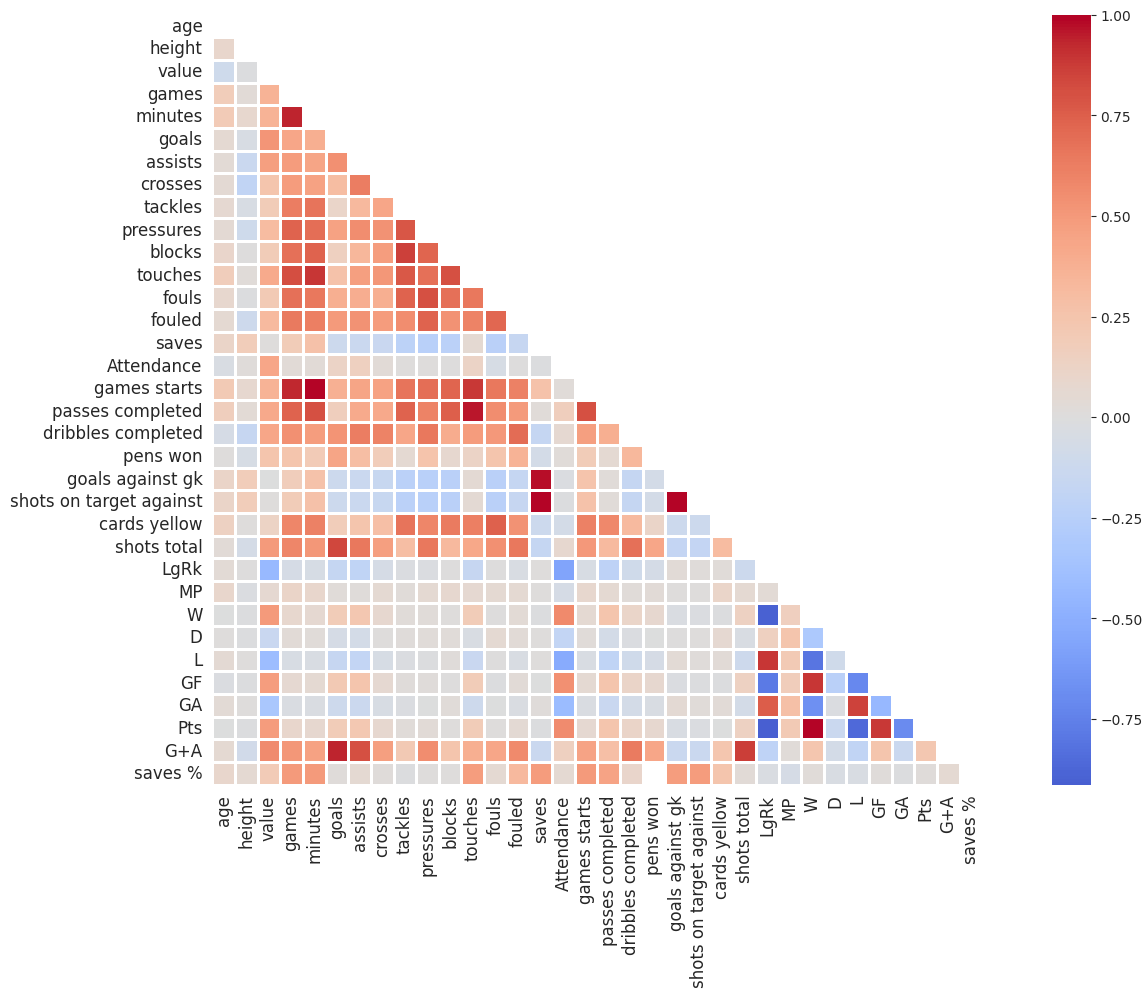

In [79]:
corr = df.corr(method='pearson')
cmap = sns.color_palette("coolwarm", as_cmap=True)
center = 0
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(18,10))
    ax=sns.heatmap(corr,mask=mask, vmax=1, cmap=cmap, center=center, square=True,fmt=".2f",annot_kws={"size": 35 / np.sqrt(len(corr.iloc[0:37,0:37]))},linewidths=1,cbar_kws={"shrink": 1})
    plt.xticks(rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90)
plt.show()

Esta es la matriz de correlación de mis variables y voy a comentar las más destacadas:
-Cercanas al uno, es decir, que cuanto más aumenta una variable, más aumenta la otra también, hay varias: en general son bastante obvias, como que cuanto más tiros hagas, más paradas va a hacer el portero. Cuantos más partidos juegues, más partidos habrá en los que hayas sido titular y más minutos jugados. También que cuantos más victorias tengas, más puntos harás.
-Próximas o incluso que llegan al -1, es decir, que cuanto más de una variable, menos de otra, hay varias también:Evidentemente, cuantas más derrotas o goles en contra tengas, menos puntos y menos victorias.
La mayoría tienen una correlación leve. Destaco la edad y altura, que tienen una correlación inexistente de 0 con la mayoría de variables.